<font size=6  color= 'white' > <b>[LEPL1507] - PROJET P4</b> <br>
<br><br>
Airson Alexis<br>
Beniffou Ibrahim <br>
Henneaux Lucas <br>
Lemaire Antoine <br>
Smith Marielle <br>
Canon Théo<br>
<div style="text-align: right"> </div>

<br><br>
</font>


In [37]:
# Import 

# We strongly recommend you to check that you have the last version of each of these packages 

from numpy import zeros, arange, array, asarray, concatenate, max, where, empty, meshgrid, sqrt, float32, multiply, uint8 
from matplotlib.pyplot import subplots, title, xticks, legend, show, figure, plot, xlabel, ylabel, subplot, tight_layout, imshow
from os import listdir, walk, makedirs
from PIL.Image import open as pil_open
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from csv import DictWriter, DictReader 
from cv2 import imread, cvtColor, COLOR_BGR2RGB, resize, GaussianBlur, COLOR_RGB2GRAY, COLOR_RGB2BGR, COLOR_GRAY2RGB, applyColorMap, addWeighted, COLORMAP_JET, imwrite
from numpy.random import normal
from keras.preprocessing.image import ImageDataGenerator
from glob2 import glob
from os.path import dirname, realpath, basename, exists, isdir, join
from random import randint
from copy import deepcopy 
from scipy.ndimage import gaussian_filter
from keras import Sequential
from keras.layers import RandomZoom, RandomRotation, RandomCrop, RandomContrast, RandomBrightness, Conv2D, MaxPool2D, Dense, Flatten, Dropout, ReLU
from tensorflow import get_logger
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from keras.backend import gradients, variable, sum, square, pow, switch, cast, relu, floatx, greater
from warnings import filterwarnings

<font size=6  color= 'white' > <b> Phase 1 : retrieving data </b> <br>

The aim of this first part is to get arrays of images for convenience 

In [2]:
# defines variables 

#-----------------------------------------------------------------------------

# Those are the path to the images 

path_training = 'BelgiumTSC_Training\Training'
path_testing = 'BelgiumTSC_Testing\Testing'

nbr_class = 62 # len(next(walk(path_training))[1])  counting the number of classes 
print('number of classes : ', nbr_class)

#-----------------------------------------------------------------------------

# resol is the format for the images that we want for convenience

resol = 50 # Square image only ! 
print("Resolution of images : ", resol)

number of classes :  62
Resolution of images :  50


In [3]:
def accessing (path, resol) : 

    # retrieving the number of images to be treated in the folder
    # returns an iterator 

    DIR = path
    counter = 0
    for root, dirs, files in walk(DIR) :
        for file in files:    
            if file.endswith('.ppm') :
                counter += 1

    print("number of images in the folder : ", counter)

    # Creating an image.DirectoryIterator to work over the images of the folder  

    datagen = ImageDataGenerator( rescale =1./255)
    set = datagen.flow_from_directory(path,target_size = (resol,resol),
    batch_size = counter,class_mode = 'binary', color_mode='rgb')

    return set

#-----------------------------------------------------------------------------

training_set = accessing(path_training, resol)
test_set = accessing(path_testing, resol) 

number of images in the folder :  4575
Found 4575 images belonging to 62 classes.
number of images in the folder :  2520
Found 2520 images belonging to 62 classes.


In [4]:
def store (iter) : 

    # Storing all the information in arrays for convenience 
    # returns arrays 

    X_iter , y_iter = iter.next()

    print("Shape of X_train : ", X_iter.shape)
    print("Shape of y_train : ", y_iter.shape)

    return X_iter, y_iter

#-----------------------------------------------------------------------------

X_train, y_train = store(training_set) 
X_test, y_test = store(test_set) 


Shape of X_train :  (4575, 50, 50, 3)
Shape of y_train :  (4575,)
Shape of X_train :  (2520, 50, 50, 3)
Shape of y_train :  (2520,)


In [5]:
# We combine the 2 sets because we will split in train and test sets by ourselves with shuffling 

X_train, X_test, y_train, y_test = train_test_split(concatenate((X_train, X_test)), concatenate((y_train, y_test)), test_size=0.25, shuffle=True, random_state=1)

print("Shape of final X_train : ", X_train.shape)
print("Shape of final y_train : ", y_train.shape)

print("Shape of final X_test : ", X_test.shape)
print("Shape of final y_test : ", y_test.shape)

Shape of final X_train :  (5321, 50, 50, 3)
Shape of final y_train :  (5321,)
Shape of final X_test :  (1774, 50, 50, 3)
Shape of final y_test :  (1774,)


<font size=6  color= 'white' > <b> Phase 2 : visualisation of the dataset </b> <br>

The aim of this part is to visualise the initial datasets 

In [6]:
# first, we want to visualize the images in our original sets 

def to_jpeg (folder_dir, dest) : 

    # Here is a code to save all ppm in jpeg in a directory (must be created)

    for image in listdir(folder_dir):
        # check if the image ends with ppm
        if (image.endswith(".ppm")):
            img = pil_open(join(folder_dir,image))
            output_path = join(dest, image.replace('.ppm', '.jpg'))
            img.save(output_path, format = 'JPEG')
            

#-----------------------------------------------------------------------------

for dir in listdir(path_training) : 

    if (isdir(realpath(join(path_training, dir)))) : # This filters the Readme 

        if not exists (join("visu/Training/", dir)) : # If the folder doesn't exist, we create it 
            makedirs(join("visu/Training/", dir))

        to_jpeg(realpath(join(path_training, dir)), join("visu/Training/", dir)) # We put all the images in jpeg in it 

#-----------------------------------------------------------------------------

for dir in listdir(path_testing) : 

    if (isdir(realpath(join(path_training, dir)))) : # This filters the Readme 

        if not exists (join("visu/Testing/", dir)) : # If the folder doesn't exist, we create it 
            makedirs(join("visu/Testing/", dir))

        to_jpeg(realpath(join(path_training, dir)), join("visu/Testing/", dir)) # We put all the images in jpeg in it 

In [7]:
def number (nbr_class, y, name) :     

    # Print the number of signs of each type in the sets

    nbr = zeros(nbr_class, dtype=int)

    for i in range(nbr_class) :
        nbr[i] = int((y.copy() == i).sum())  # Number of images of class i in the set 

    print("Number of each sign in the set : " + name)
    print()
    print(nbr)
    print()
    print("Total of signs : ", nbr.sum())
    print()

    return nbr

#-----------------------------------------------------------------------------

initial_nbr_train = number(nbr_class, y_train, 'y_train')
initial_nbr_test = number(nbr_class, y_test, 'y_test')

Number of each sign in the set : y_train

[ 16 106  17  15  17  13  21 183  29  14  35   5  17  97  42   8  19 195
 150 285  28  68 336  23  44  38   4  18 129  48  53 109 570   9  36 169
  14  92 367 216 226 112  27  26  37 114  39 131   9  11  10  22  20 178
 122  22 101  86  23  42  20 288]

Total of signs :  5321

Number of each sign in the set : y_test

[  5  31   3   6  10   1   3  64  10   4  14   2   4  32  16   1   2  67
  53 109  17  20 100   7  17   7   2   9  47  13  21  40 168   3  19  45
   4  37 131  79  64  47  17  10  14  44  11  47   2   4   5   8   7  45
  44   5  27  33   1  17   0  99]

Total of signs :  1774



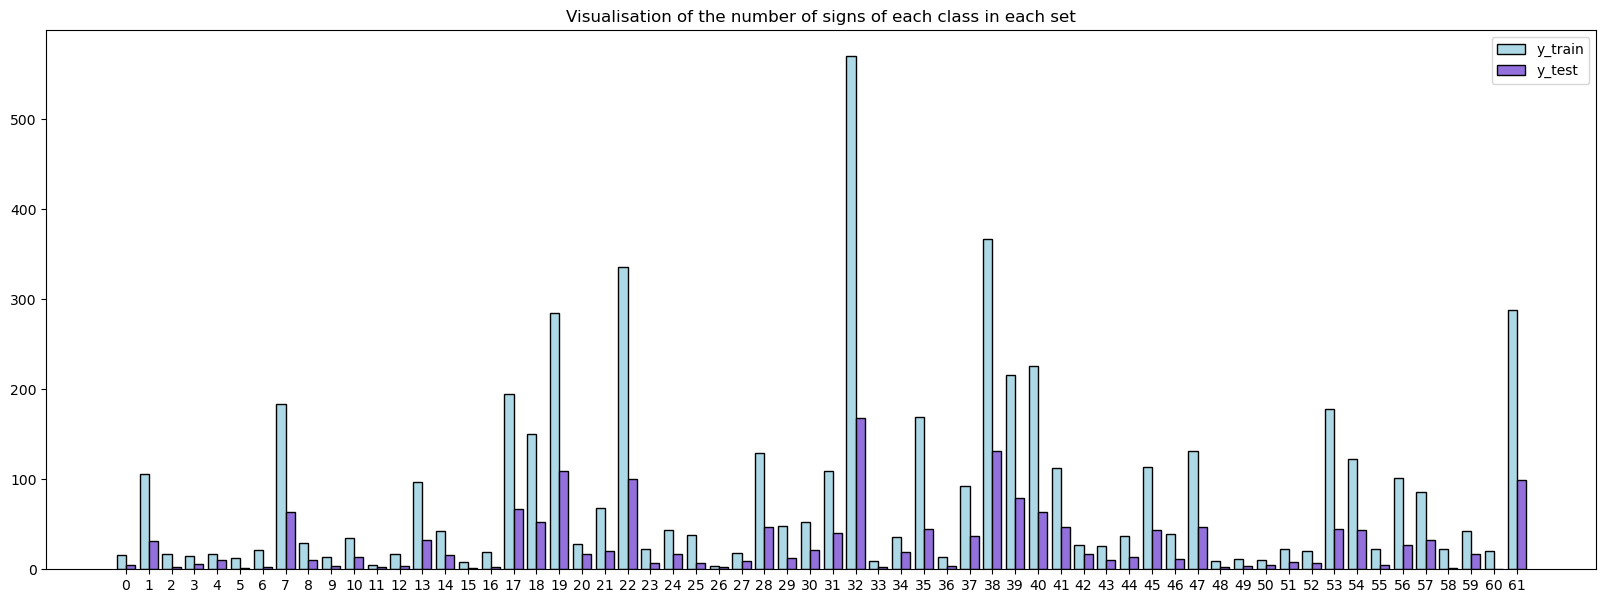

In [8]:
def graphs (nbr_class, set_1, set_2, name_1, name_2) : 

    # We plot an histo showing how many signs of each class we have in each set 

    fig, ax = subplots(figsize = (20, 7))
    bins = [x + 0.5 for x in range(-1, nbr_class)]
    ax.hist([set_1, set_2], range = (0, nbr_class - 1), bins=bins, edgecolor = 'black', color = ['lightblue', 'mediumpurple'], label = [name_1, name_2])
    title("Visualisation of the number of signs of each class in each set")
    xticks(arange(nbr_class))
    legend()
    show()

#-----------------------------------------------------------------------------

graphs(nbr_class, y_train, y_test, 'y_train', 'y_test')

<font size=6  color= 'white' > <b> Phase 3 : augmentation of the dataset </b> <br>

The aim of this part is to change the sizes of the initial datasets with some modification of image 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


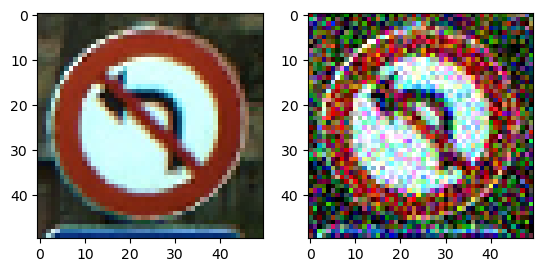

In [9]:
def noise (img, mean, var) : 

    # This fct applies random (normal) noise on an image 

    row,col,ch= img.shape

    sigma = var**0.5

    gauss = normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noise = img + gauss   

    return noise 

#-----------------------------------------------------------------------------

# A little visualisation of the noise 

# Here are the parameters for the normal noise we'll apply on image 
mean = 0
var = 0.05

Noise = zeros(X_train.shape)

for i in range (len(X_train)) : 
    Noise[i] = noise(deepcopy(X_train[i]), mean, var)

idx = randint(0,len(X_train))

figure()
subplot(121)
imshow(X_train[idx])
subplot(122)
imshow(Noise[idx])


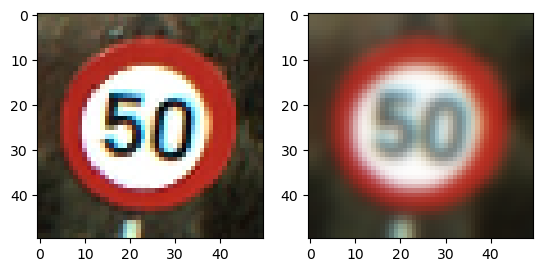

In [10]:
def blur (img, resol, sigma) : 

    # This fct applies blur on an image by applying GaussianBlur 

    blur = GaussianBlur(img,(resol+1,resol+1), sigma)

    return blur 

#-----------------------------------------------------------------------------

# A little visualisation of the blur 

# Here are the parameters for variation of intensity on pixels 
sigma = 1.5 

Blur = zeros(X_train.shape)

for i in range (len(X_train)) : 
    Blur[i] = blur(deepcopy(X_train[i]), resol, sigma)

idx = randint(0,len(X_train))

figure()
subplot(121)
imshow(X_train[idx])
subplot(122)
imshow(Blur[idx])

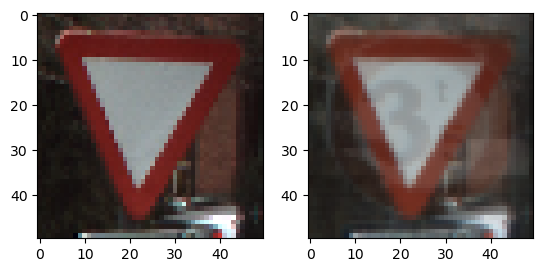

In [11]:
# Applying gaussian filter 

filter = gaussian_filter(deepcopy(X_train), 0.5)

# A little visualisation of the filter 

idx = randint(0,len(X_train))

figure()
subplot(121)
imshow(X_train[idx])
subplot(122)
imshow(filter[idx])

In [12]:
# Here's another model of augmentation using keras 

get_logger().setLevel('ERROR')

data_augmentation = Sequential() 

data_augmentation.add(RandomRotation((-0.05, 0.05)))
data_augmentation.add(RandomZoom(height_factor=(-0.3, -0.2),width_factor=(-0.3, -0.2)))
data_augmentation.add(RandomCrop(height=resol,width=resol))
data_augmentation.add(RandomBrightness((-0.2,0.5), value_range=(0.0, 1.0)))
data_augmentation.add(RandomContrast((0.0,5.0)))

#-----------------------------------------------------------------------------

augmentation_noise_blur = Sequential()

augmentation_noise_blur.add(RandomRotation((-0.05, 0.05)))
augmentation_noise_blur.add(RandomZoom(height_factor=(-0.3, -0.2),width_factor=(-0.3, -0.2)))
augmentation_noise_blur.add(RandomCrop(height=resol,width=resol))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


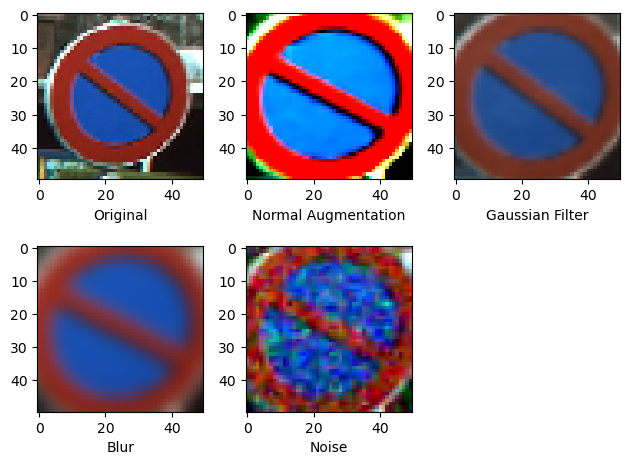

In [13]:
idx = randint(0,len(X_train))

# A visualisation of what we'll see in the augmented dataset 

figure()
subplot(231)
imshow(X_train[idx])
xlabel("Original")
subplot(232)
imshow(data_augmentation(X_train[idx]))
xlabel("Normal Augmentation")
subplot(233)
imshow(augmentation_noise_blur(filter[idx]))
xlabel("Gaussian Filter")
subplot(234)
imshow(augmentation_noise_blur(Blur[idx]))
xlabel("Blur")
subplot(235)
imshow(augmentation_noise_blur(Noise[idx]))
xlabel("Noise")

tight_layout()

In [14]:
# Let's now create artificial images from the ones we already have with some previous modifications 

# We define a limit of sign of each type that we want in our augmented dataset 
# And we'll count the number of elements that we must add 

#-----------------------------------------------------------------------------

lim = max(initial_nbr_train) - 100

aug = zeros(nbr_class, dtype=int)
counter = 0

for i in range(nbr_class) :

    if initial_nbr_train[i] >= lim : continue # This means that we have a well represented class, so nothing must be done 
    
    aug[i] = int(3/4*(lim - initial_nbr_train[i])) # To respect a certain "proportionnality", we add only 3/4 of the difference to the limit 
    counter += aug[i]

#-----------------------------------------------------------------------------

# Creating new sets 

X_train_new = zeros((len(X_train) + counter, resol, resol, 3))
y_train_new = zeros(len(y_train) + counter)
X_train_new[:len(X_train)] = X_train
y_train_new[:len(y_train)] = y_train

#-----------------------------------------------------------------------------

index = len(X_train)

# Here we recompute the noise, historical reason 
# This has been kept to avoid errors 

noise = zeros(X_train.shape)
row,col,ch= X_train[0].shape
mean = 0
var = 0.05
sigma = var**0.5

#-----------------------------------------------------------------------------

# aug[i] is the number of sign of this class to add 

# (1/3) images in the set with noise on it 
# (1/3) images in the set with blur on it
# (1/3) images in the set with the augmentation with keras 

# Each augmented image is created from a random image in the initial set 

for i in range(nbr_class) :

    indices = where(y_train == i)
        
    # NORMAL AUGMENTATION
    for j in range(int(aug[i]/3)) :
        idx = randint(0, len(indices[0])-1)
        augmented_image = data_augmentation(X_train[indices[0][idx]])
        X_train_new[index] = augmented_image
        y_train_new[index] = i
        index += 1
    
    # NOISE
    for j in range(int(aug[i]/3)) :
        idx = randint(0, len(indices[0])-1)
        gauss = normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        augmented_image = X_train[indices[0][idx]] + gauss
        X_train_new[index] = augmentation_noise_blur(augmented_image)
        y_train_new[index] = i
        index += 1
    
    # BLUR
    for j in range(aug[i] - int(2*aug[i]/3)) :
        idx = randint(0, len(indices[0])-1)
        augmented_image = GaussianBlur(X_train[indices[0][idx]],(51,51),1.5)
        X_train_new[index] = augmentation_noise_blur(augmented_image)
        y_train_new[index] = i
        index += 1

Number of each sign in the set : y_train

[368 379 356 355 356 355 357 397 359 356 360 353 356 376 363 354 356 400
 390 423 359 369 436 357 363 362 353 357 384 364 365 379 570 354 361 394
 356 375 443 406 409 380 358 359 361 381 361 384 354 354 355 358 357 397
 383 358 377 374 357 363 357 424]

Total of signs :  23237



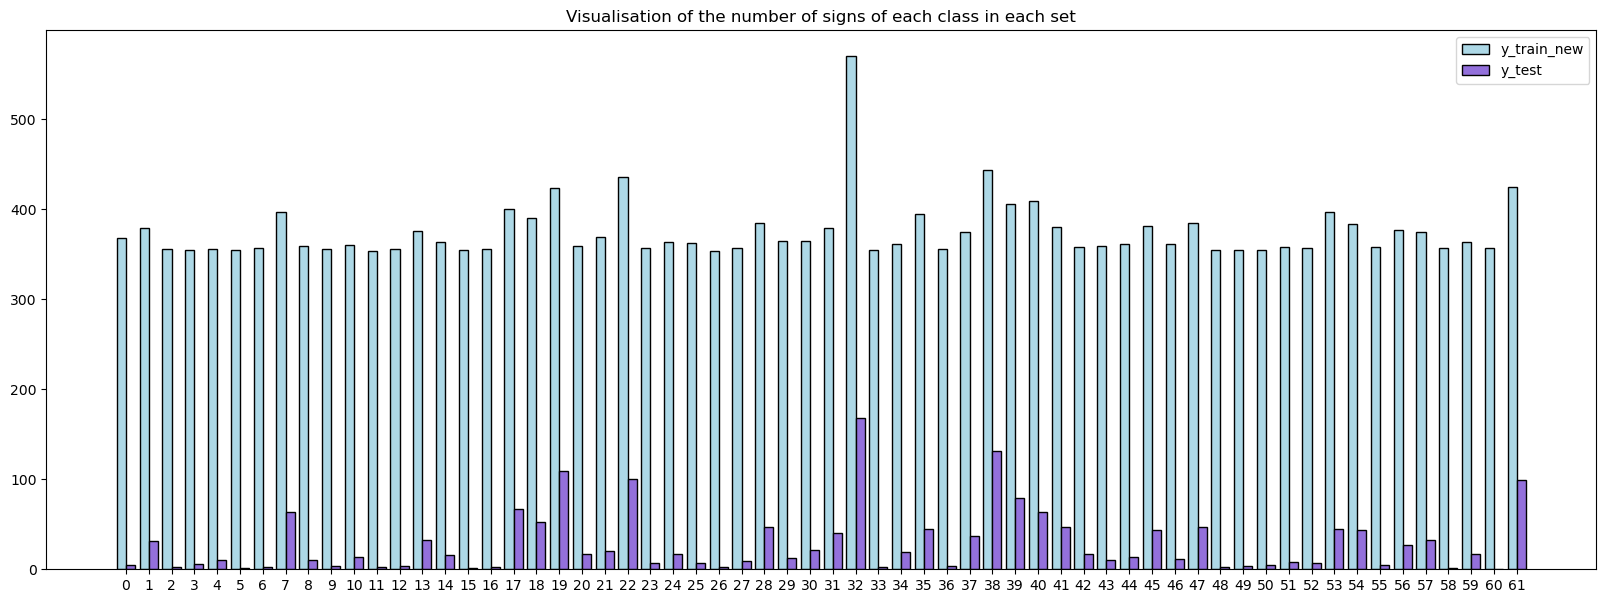

In [15]:
# Visualisation of the augmented dataset 

nbr_train = number(nbr_class, y_train_new, 'y_train')
graphs(nbr_class, y_train_new, y_test, 'y_train_new', 'y_test')

In [16]:
# Erasing part of the picture to avoid overfitting 

X_train_new_erase = empty(X_train_new.shape)

for i in range(X_train_new.shape[0]):
    
    aug_img = X_train_new[i]
    new_img = array(aug_img)
    yes_or_no = randint(0, 9)                  # this will decide if we erase or not

    if yes_or_no < 5:                                 # 50% chance of erasing
        random_size = randint(0, 3)            # this will decide the size of the patch
        if random_size == 0:
            x_place = randint(0, resol-7)      # we want to erase a 7x15 rectangle
            y_place = randint(0, resol-15)
            for k in range(x_place, x_place+7):
                for j in range(y_place, y_place+15):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0
                    
        elif random_size == 1:
            x_place = randint(0, resol-5)      # we want to erase a 5x10 rectangle
            y_place = randint(0, resol-10)
            for k in range(x_place, x_place+5):
                for j in range(y_place, y_place+10):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0

        elif random_size == 2:
            x_place = randint(0, resol-15)     # we want to erase a 15x7 rectangle
            y_place = randint(0, resol-7)
            for k in range(x_place, x_place+15):
                for j in range(y_place, y_place+7):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0
        else:
            x_place = randint(0, resol-10)     # we want to erase a 10x5 rectangle
            y_place = randint(0, resol-5)
            for k in range(x_place, x_place+10):
                for j in range(y_place, y_place+5):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0

    X_train_new_erase[i] = new_img

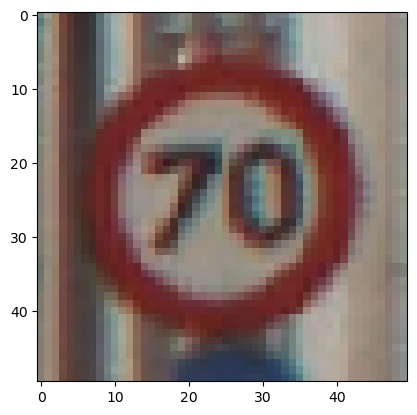

In [17]:
idx = randint(0,len(X_train_new_erase))

figure()
imshow(X_train_new_erase[idx])

<font size=6  color= 'white' > <b> Phase 4 : Construction of the model </b> <br>

The aim of this part is to construct a model using CNN

In [18]:
# This is just a change of dimension for the model

y_train_tc = to_categorical(y_train_new, nbr_class)
y_test_tc = to_categorical(y_test, nbr_class)

print("initial shape of y_train : ", y_train_new.shape)
print("After categorical : ", y_train_tc.shape)

print("initial shape of y_test : ", y_test.shape)
print("After categorical : ", y_test_tc.shape)

initial shape of y_train :  (23237,)
After categorical :  (23237, 62)
initial shape of y_test :  (1774,)
After categorical :  (1774, 62)


In [19]:
# Here's the model defined with keras 

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(resol,resol,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(nbr_class, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

1/1 [==============================] - 8s 8s/step


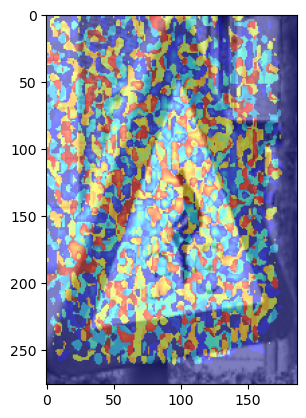

In [22]:
# Here's the part of the code dedicated to guided backpropagation 

def guided_relu(x):
    """Guided ReLU activation function with center mask."""
    # Compute the gradient of the output with respect to the input
    grad_y = gradients(sum(square(x)), x)[0]
    
    # Compute the mask as a Gaussian function centered on the input shape
    mask = variable(get_center_mask(x.shape, r=10, sigma=0.5))
    
    # Emphasize the pixels at the center of the image
    mask = pow(mask, 2)
    
    # Apply the mask to the gradient
    grad_y = grad_y * mask
    
    # Set negative gradients to zero
    grad_y = switch(grad_y > 0, grad_y, 0)
    
    # Set positive gradients to their original value
    grad_y *= cast(greater(x, 0), floatx())
    
    # Apply the guided ReLU activation function
    return relu(x) * grad_y


def get_center_mask(shape, r=10, sigma=0.5):
    """Create a Gaussian mask with a circular region of interest (ROI) around the center of the input shape."""
    center = tuple(dim // 2 for dim in shape)
    coords = meshgrid(*[arange(dim) for dim in shape])
    dists = sqrt(sum([(coord - c) ** 2 for coord, c in zip(coords, center)]))
    mask = zeros(shape)
    mask[dists <= r] = 1
    mask = GaussianBlur(mask, (0, 0), sigma)
    mask = float32(mask / max(mask))
    return mask

# Replace all ReLU activations in your model with guided ReLU
for layer in model.layers:
    if isinstance(layer, ReLU):
        layer.activation = guided_relu 

from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from tensorflow import convert_to_tensor, GradientTape, argmax

def prep_input(path):
    image = pil_open(path)

    preprocess = Compose([
    Resize(resol),
    CenterCrop(resol),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

    image = preprocess(image)
    image.unsqueeze_(0)

    image = image.permute(0, 2, 3, 1)

    # Convert to NumPy array
    image = image.numpy()

    # Convert to TensorFlow tensor
    image = convert_to_tensor(image)

    return image

NAME = "exemple.jpg"

# Obtain the model's output for a given input image
input_image = prep_input(NAME)
output = model.predict(input_image)

with GradientTape() as tape:
    tape.watch(input_image)
    preds = model(input_image)
    top_pred_index = argmax(preds, axis=1)[0]
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, input_image)[0]
guided_grads = grads.numpy()
heatmap = multiply(guided_grads, input_image.numpy())[0]

# Convert input image to grayscale
gray_img = cvtColor(array(pil_open(NAME)), COLOR_RGB2GRAY)
gray_img = cvtColor(gray_img, COLOR_GRAY2RGB)

# Normalize heatmap
heatmap /= max(heatmap)

# Resize heatmap to match the size of the grayscale input image
heatmap = resize(heatmap, (gray_img.shape[1], gray_img.shape[0]))

# Apply heatmap on grayscale image
heatmap = uint8(255 * heatmap)
heatmap = applyColorMap(heatmap, COLORMAP_JET)
overlayed_img = addWeighted(gray_img, 0.5, heatmap, 0.5, 0)

# Display the overlayed image
imshow(cvtColor(overlayed_img, COLOR_BGR2RGB))
show()

In [23]:
# We train here the model 
# We don't use the callbacks anymore because the assistant told that it wasn't a good idea 

#-----------------------------------------------------------------------------

# This will stop training if we reach 98% accuracy 

class haltCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.98):
            print("\n\n\nReached 0.98 val accuracy so cancelling training!\n\n\n")
            self.model.stop_training = True

#-----------------------------------------------------------------------------

trainingStopCallback = haltCallback()
mycallbacks = [EarlyStopping(monitor='val_accuracy', restore_best_weights = True)]

eps = 10 # The number of time we want the model to train on the entire training_set

anc = model.fit(X_train_new_erase, y_train_tc, validation_data=(X_test, y_test_tc), epochs=eps)

Epoch 1/10
727/727 [==============================] - 190s 256ms/step - loss: 2.1140 - accuracy: 0.4449 - val_loss: 0.3614 - val_accuracy: 0.9138
Epoch 2/10
727/727 [==============================] - 206s 283ms/step - loss: 0.5357 - accuracy: 0.8368 - val_loss: 0.1745 - val_accuracy: 0.9442
Epoch 3/10
727/727 [==============================] - 248s 341ms/step - loss: 0.3353 - accuracy: 0.8978 - val_loss: 0.1492 - val_accuracy: 0.9538
Epoch 4/10
727/727 [==============================] - 226s 310ms/step - loss: 0.2673 - accuracy: 0.9187 - val_loss: 0.1134 - val_accuracy: 0.9673
Epoch 5/10
727/727 [==============================] - 236s 324ms/step - loss: 0.2284 - accuracy: 0.9329 - val_loss: 0.1024 - val_accuracy: 0.9679
Epoch 6/10
727/727 [==============================] - 224s 308ms/step - loss: 0.2021 - accuracy: 0.9371 - val_loss: 0.1018 - val_accuracy: 0.9735
Epoch 7/10
727/727 [==============================] - 200s 275ms/step - loss: 0.1772 - accuracy: 0.9471 - val_loss: 0.0958 -

<font size=6  color= 'white' > <b> Phase 5 : Analysis of performances </b> <br>

The aim of this part is to analyse the results of the model based on the testing set available 

In [24]:
# Here are the names of the sign 

label_names = __builtins__.open("dict.csv", "r").read().strip().split("\n")[0:]
label_names = [l.split(",")[1] for l in label_names]

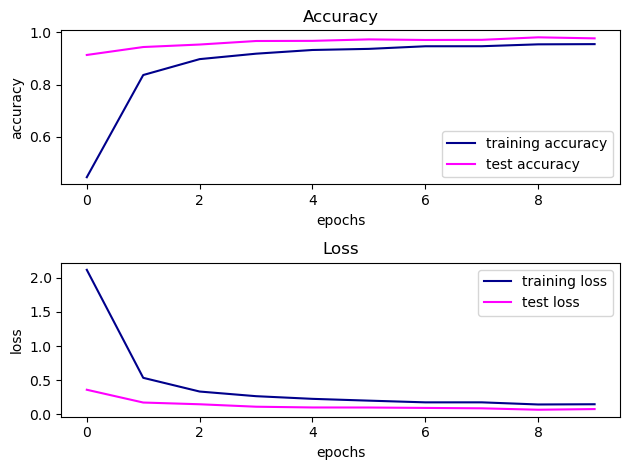

In [25]:
def perf(anc) : 

    # Plot of performances of the model on the training sets 

    figure()

    subplot(2, 1, 1)
    plot(anc.history['accuracy'], label='training accuracy', color = 'darkblue')
    plot(anc.history['val_accuracy'], label='test accuracy', color = 'magenta')
    title('Accuracy')
    xlabel('epochs')
    ylabel('accuracy')
    legend()

    subplot(2, 1, 2)
    plot(anc.history['loss'], label='training loss', color = 'darkblue')
    plot(anc.history['val_loss'], label='test loss', color = 'magenta')
    title('Loss')
    xlabel('epochs')
    ylabel('loss')
    legend()

    tight_layout()
    show()

#-----------------------------------------------------------------------------

perf(anc) 

In [26]:
def ratio_kaggle (y_test_tc, X_test, model) :

    # Here's a function that will give the score that we can see on kaggle based on the testing dataset 

    true = y_test_tc.argmax(axis=1)

    print("True codes : ", true)
    print("Number of codes : ", len(true))

    predict = model.predict(X_test).argmax(axis=1)

    print("Predictions : ", predict)
    print("Number of predictions : ", len(predict))

    right = 0 

    for i in range(len(true)) : 
        if predict[i] == true[i] :  
            right += 1 

    print("Number of right : ", right)
    print("Number of elements : ", len(true))

    print("Ratio : ", right/len(true))

#-----------------------------------------------------------------------------

ratio_kaggle(y_test_tc, X_test, model)

True codes :  [50 19 31 ... 17  7 18]
Number of codes :  1774
56/56 [==============================] - 4s 64ms/step
Predictions :  [50 19 31 ... 17  7 18]
Number of predictions :  1774
Number of right :  1734
Number of elements :  1774
Ratio :  0.9774520856820744


In [27]:
def network (model, y_test_tc, X_test, label_names, nbr_class) : 

    # Evaluate the network
    # This displays the precision and recall on each type of sign 

    print("[INFO] evaluating network...")
    predictions = model.predict(X_test) 
    print(classification_report(y_test_tc.copy().argmax(axis=1),
        predictions.argmax(axis=1), target_names=label_names, labels=range(nbr_class)))

#-----------------------------------------------------------------------------

filterwarnings('ignore')

network(model, y_test_tc, X_test, label_names, nbr_class)

[INFO] evaluating network...
56/56 [==============================] - 4s 62ms/step
                                 precision    recall  f1-score   support

               "uneven_surface"       1.00      1.00      1.00         5
                         "bump"       1.00      1.00      1.00        31
                     "slippery"       1.00      1.00      1.00         3
                   "left_curve"       1.00      1.00      1.00         6
                  "right_curve"       0.77      1.00      0.87        10
                  "left_curves"       1.00      1.00      1.00         1
                 "right_curves"       1.00      1.00      1.00         3
                     "children"       0.97      0.94      0.95        64
                      "cyclist"       0.91      1.00      0.95        10
                      "animals"       1.00      1.00      1.00         4
                    "roadworks"       0.82      1.00      0.90        14
              "traffic_signals"       1.

<font size=6  color= 'white' > <b> Phase 6 : Generating csv for kaggle </b> <br>

The aim of this part is to predict on the 1st kaggle dataset and generate a csv 

In [28]:
# We want to visualize the images in the set 

folder_dir = "challenge_1/eval_kaggle1"
dest = "visu/challenge1"

if not exists(dest) : 
    makedirs(dest)

to_jpeg(folder_dir, dest)

In [32]:
def Store(path, resol) : 

    # We store all of the images from the kaggle folder in an array using PIL package 
    # recall that target has been defined above 

    images = [] 
    names = []

    # get the path/directory
    folder_dir = path

    for image in listdir(folder_dir):
        # check if the image ends with ppm
        if (image.endswith(".ppm")):
            img = pil_open(folder_dir + '/' + image)
            img = img.resize((resol, resol)) # (30,30) as an example 
            img = asarray(img)
            images.append(img) 
            names.append(image.replace('.ppm',''))

    images = array(images)

    print("Number of images and their resolution in the kaggle dataset : ", images.shape)

    return images, names

#-----------------------------------------------------------------------------

images, names = Store('challenge_1/eval_kaggle1', resol)
print(images.shape)

Number of images and their resolution in the kaggle dataset :  (202, 50, 50, 3)
(202, 50, 50, 3)


In [33]:
# We print there the predictions for the dataset of kaggle 

print("[INFO] evaluating network...")

predictions = model.predict(images).argmax(axis=1)
print(predictions)

[INFO] evaluating network...
7/7 [==============================] - 1s 59ms/step
[ 8 45 25 61 19 20 21 14 21 31 45 40 51 21  8 30 44 51 40 59 39 17 40 39
 21 20 59  3  3 22 14 19 21 25 57 37 10 14 18 61 23 10 28 12 61  9 28  1
 12 56 57 31 22 61  8 39 31  7 20 36 28 19 17 33 40 38 24 38 33 61 17 26
 46 28  9 10 33 18 23 47 17 27 12 13 22 28 27 54 28 13 53 14 21 10  7 25
 51  8 39 18 51 13 35 40 30 22 59  4 30 59 19 18 34 27 33 57  4 15  1  9
 30 13 45  4 32 25 17 34 15 52 36 32  3 57 26 54 51 53 37  6 29  4 33 39
 45 25 56 39 16 21 30 49 39 29 29 38 29 45 44 44 13 56 17  0 39 13 31 54
  0  9 46 35 30 36 38  3 15 34  4 23  0  3 40 16 40 13 14 45 39  7  1 39
 28 13 39 20  4 24 31 56 52 39]


In [34]:
# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

In [35]:
# Here is the code to write the results in a CSV for kaggle 

with open('kaggle1.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)): 
        writer.writerow({'Id' : names[i], 'Category' : predictions[i]})

In [38]:
# We can visualize the classification made on the kaggle 1st dataset 

for i in range (len(images)): 
    sign = data[str(predictions[i])]
    if not exists("challenge_1/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "")):
        makedirs("challenge_1/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', ""))
    imwrite("challenge_1/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "") + "/" + str(i) + "_" + str(sign) + '.jpeg', cvtColor(images[i], COLOR_RGB2BGR))